In [1]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.cluster import  MiniBatchKMeans
import numpy as np
import pandas as pd
from joblib import dump, load

%autosave 0 

Autosave disabled


In [2]:


class HMM (object):
             def __init__(self,A,B,PI):
                 self.A=A
                 self.B=B
                 self.PI=PI   
def viterbi(obs,Modelo1,PI):
    
    delta=np.zeros((len(obs)+1,len(Modelo1.A)))
    phi=np.zeros((len(obs)+1,len(A)))+666
    path =np.zeros(len(obs)+1)
    T=len(obs)
    Modelo1.PI = PI
    delta[0,:]= Modelo1.PI * Modelo1.B[:,obs[0]]
    phi[0,:]=666
    for t in range(len(obs)):
        for j in range(delta.shape[1]):

            delta [t+1,j]=np.max(delta[t] * A[:,j]) * B[j,obs[t]]
            phi[t+1,j]= np.argmax(delta[t] * A[:,j])
    path[T]=int(np.argmax(delta[T,:]))
    for i in np.arange(T-1,0,-1):
        #print (i,phi[i+1,int(path[i+1])])
        path[i]=phi[i+1,int(path[i+1])]
    return(path)
def cuantizar_xy(xy, cc):
    xycuant=cc
    out=np.power(xycuant-xy,2).sum(axis=1).argmin()
    return out
    
def path_to_xy(path,ccxy):
    estimated= pd.DataFrame(path.astype(int).T)
    estimated.columns=['Path_vit']
    estimated['xcuant'] = estimated['Path_vit'].apply(lambda x: ccxy[x,0])
    estimated['ycuant'] = estimated['Path_vit'].apply(lambda x: ccxy[x,1])                                
    return (estimated)
def quantized(xyth,ccxyth):
    xythcuant=np.argmin(np.linalg.norm(xyth-ccxyth,axis=1))
    x,y=ccxyth[xythcuant,:2]
    return ((x,y),(xythcuant))
def viterbi(obs,Modelo1,PI):
    A, B= Modelo1.A , Modelo1.B
    
    delta=np.zeros((len(obs)+1,len(Modelo1.A)))
    phi=np.zeros((len(obs)+1,len(A)))+666
    path =np.zeros(len(obs)+1)
    T=len(obs)
    Modelo1.PI = PI
    delta[0,:]= Modelo1.PI * Modelo1.B[:,obs[0]]
    phi[0,:]=666
    for t in range(len(obs)):
        for j in range(delta.shape[1]):

            delta [t+1,j]=np.max(delta[t] * A[:,j]) * B[j,obs[t]]
            phi[t+1,j]= np.argmax(delta[t] * A[:,j])
    path[T]=int(np.argmax(delta[T,:]))
    for i in np.arange(T-1,0,-1):
        #print (i,phi[i+1,int(path[i+1])])
        path[i]=phi[i+1,int(path[i+1])]
    return(path)



In [3]:
def Markov_A_2_grafo(A,ccxyth):
    dists=np.zeros(A.shape)
    for i in range(A.shape[0]):
        for j in range (A.shape[1]):
            if A[i,j]!=0 :
                dists[i,j]= np.linalg.norm(ccxyth[i]-ccxyth[j])    
    
    
    con = np.where(dists==0,np.inf,dists)
    graphe2=grafo(ccxyth,con)
    return graphe2


class node(object):
    def __init__(self,x,y):
        self.x=x
        self.y=y
        
        
class grafo (object):
             def __init__(self,nodos,conec):
                 self.nodos=nodos
                 self.conec=conec        

def dijkstra(nodoinicial,nodofinal,graphe):
    

    numnodos= len(graphe.nodos)
    con = graphe.conec
    D= np.ones(numnodos)*np.inf
    Prv= np.ones(numnodos)*np.inf
    V= np.zeros(numnodos)
    a = nodoinicial
    D[a]=0
    Prv[a]=0
    Prv[np.where(con[a]!=np.inf)]=a
    V[a]=1
    Dacc=D[a]
    ########
    D=np.minimum(D,con[a]+D[a])
    cont=0
    sucess=False
    while(sucess==False):
        a = np.argmin(D+np.where (V==1,np.inf, V))
        Dacc=D[a]
        Prv[np.where(D>(con[a]+Dacc) )]=a
        V[a]=1
        D=np.minimum(D,con[a]+Dacc)
        if (a== nodofinal):
            print("RUTA CALCULADA ")
            sucess=True
    rutainv=[]
    rutainv.append(nodofinal)
    while(rutainv[-1]!=nodoinicial):
        prv=Prv[int(rutainv[-1])]
        rutainv.append(prv)

    ruta=[]
    for n in reversed(rutainv):
        ruta.append(n)
    return(ruta)


In [4]:
both=False
data=pd.read_csv('dataset_candidatura_wr/lecs_odom_wrs_candidatura.txt')
data2=pd.read_csv('dataset_candidatura_wr/lecs_odom(short distance).txt')
data3=pd.read_csv('dataset_candidatura_wr/lecs_odom(wheel_odom_short).txt')
#data=data2
#data=data.iloc[:30000,:]

cols=['x','y','theta']
n_reads=data.shape[1]-3
n_reads
etiquetas=[]
for i in range (n_reads):
    etiquetas.append('R'+str(i))

        
for lab in cols:
    etiquetas.append(lab)
data.columns=etiquetas

if both:
    

    data2.columns,data3.columns=etiquetas,etiquetas
    data=pd.concat((data,data2,data3))
    

"""if (only_nice!=True):
    print("NOT ONLY NICE")
    data2=pd.read_csv('lecturasconodometria.txt')
    data2.columns=etiquetas
    data3= pd.concat((data,data2))
    data=data3

"""



####
#index = data[data.y<-1].index
#data=data.drop(index)
data.describe()



#####

xyth=data[['x','y','theta']]

lecs=data.iloc[:,0:n_reads]
lecs=np.clip(lecs,0,5)
data.iloc[:,0:n_reads]=lecs

data.describe()



,R0,R1,R2,R3,R4,R5,R6,R7,R8,R9,...,R714,R715,R716,R717,R718,R719,R720,x,y,theta
count,50782.000000,50782.000000,50782.000000,50782.000000,50782.000000,50782.000000,50782.000000,50782.000000,50782.000000,50782.000000,...,50782.000000,50782.000000,50782.000000,50782.000000,50782.000000,50782.000000,50782.000000,50782.000000,50782.000000,50782.000000
mean,1.862142,1.858648,1.855630,1.852087,1.834956,1.816233,1.812975,1.810190,1.783855,1.769751,...,1.757538,1.762407,1.769862,1.776184,1.785385,1.797030,1.802159,1.581827,1.986748,0.065330
std,0.998050,1.000647,1.001650,1.001916,0.988282,0.970156,0.971561,0.974396,0.943827,0.926998,...,0.987997,0.989745,0.990691,0.992050,1.004045,1.019378,1.022828,0.859916,1.361133,1.825489
min,0.250391,0.248982,0.247597,0.246235,0.244889,0.243533,0.242142,0.240773,0.239428,0.238106,...,0.241084,0.243378,0.246052,0.249102,0.250459,0.251839,0.253243,-0.806764,-0.246146,-3.141391
25%,1.080115,1.076131,1.073551,1.070807,1.066315,1.063815,1.062718,1.059461,1.057145,1.056190,...,1.024115,1.025566,1.032490,1.039203,1.042899,1.047174,1.049327,0.892228,0.742345,-1.647014
50%,1.648395,1.642078,1.637550,1.632497,1.626502,1.622752,1.616736,1.608782,1.605548,1.600604,...,1.600900,1.622278,1.640815,1.649801,1.655110,1.660220,1.665345,1.861209,1.901562,0.316773
75%,2.290948,2.274905,2.264322,2.256297,2.234620,2.221902,2.218269,2.218955,2.193848,2.177797,...,2.150101,2.149219,2.162497,2.175407,2.181461,2.188653,2.195372,2.287076,3.311919,1.596204
max,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,...,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,3.267533,4.347452,3.141541


In [5]:
get_new_ccs=False
Q_aff=True
if get_new_ccs:
    
    K_corpus=128
    N=32
    
    kmedias=MiniBatchKMeans(init='k-means++', n_clusters=K_corpus, batch_size=1000,
                      n_init=10, max_no_improvement=10, verbose=0)
    kmedias.fit(lecs)
    ccvk=kmedias.cluster_centers_
    mbk = MiniBatchKMeans(init='k-means++', n_clusters=N, batch_size=1000,
                      n_init=10, max_no_improvement=10, verbose=0)
    mbk.fit(xyth)
    ccxyth=mbk.cluster_centers_
else:
    ccxyth,ccvk=np.load('ccxyth.npy'),np.load('ccvk.npy')
    print("CUANTIZANDO SIN RECALCULAR CC")
aus=[]
auvks=[]
for i,lec in zip(xyth.values, lecs.values):
    _, au= quantized(i , ccxyth)
    aus.append(au)

    auvk= np.power(lec.T-ccvk,2).sum(axis=1,keepdims=True).argmin()
    auvks.append(auvk)


if (Q_aff==True):

    lecs=np.clip(lecs,0,5)
    clf=load('aff_prop_class.joblib_2') ##PYTHON VERSION 2 
    data['Vk_aff']=clf.predict(lecs)

if (Q_aff!=True):
    data['Vk_aff']=data['Vk']

data['Y']=aus
data['Vk']=auvks
obs,est= data['Vk'].values,data['Y'].values
obs_aff= data['Vk_aff'].values
np.save('obs.npy',obs)
np.save('est.npy',est)
np.save ('ccxyth.npy',ccxyth)
np.save ('ccvk.npy',ccvk)
data.to_csv('pddata.csv')    
print('new obs/ est almacenados')
data['Y'].describe()   

CUANTIZANDO SIN RECALCULAR CC
new obs/ est almacenados


count    50782.000000
mean        14.409377
std          9.169918
min          0.000000
25%          6.000000
50%         14.000000
75%         22.000000
max         31.000000
Name: Y, dtype: float64

In [6]:
"""new_xyth=False
if new_xyth:

    xyth_symbols=data[['x','y','theta','Vk','Vk_aff']]
    mbk.fit(xyth_symbols)
    ccxyth_symbols=mbk.cluster_centers_
    ccxyth=ccxyth_symbols[:,:3]
    data.Y=mbk.labels_
    est= data['Y'].values

"""
#DEPREACATION WARNING (Creio que no se usa)

In [7]:
save=True

In [8]:

data

,R0,R1,R2,R3,R4,R5,R6,R7,R8,R9,...,R717,R718,R719,R720,x,y,theta,Vk_aff,Y,Vk
0,1.396528,1.397393,1.398307,1.399269,1.400280,1.401341,1.402451,1.403610,1.404819,1.406078,...,1.867227,1.862315,1.857492,1.852756,0.814740,0.439526,0.631170,139,6,15
1,1.405517,1.406495,1.407521,1.408598,1.409724,1.410899,1.412125,1.413401,1.414728,1.416105,...,1.862591,1.857858,1.853212,1.848652,0.821618,0.444752,0.644063,139,6,15
2,1.410712,1.411652,1.412641,1.413679,1.414767,1.415905,1.417093,1.418332,1.419620,1.420960,...,1.876717,1.871883,1.867138,1.862480,0.830271,0.451366,0.639084,139,6,15
3,1.416657,1.417555,1.418502,1.419498,1.420545,1.421641,1.422788,1.423985,1.425232,1.426530,...,1.893292,1.888343,1.883484,1.878714,0.840628,0.458839,0.633607,139,6,15
4,1.423344,1.424206,1.425118,1.426080,1.427091,1.428153,1.429265,1.430427,1.431640,1.432903,...,1.910340,1.905284,1.900319,1.895444,0.851976,0.466804,0.628898,139,6,15
5,1.429701,1.430516,1.431381,1.432296,1.433261,1.434276,1.435341,1.436457,1.437623,1.438840,...,1.929417,1.924228,1.919132,1.914129,0.863856,0.474778,0.622863,139,6,15
6,1.435665,1.436422,1.437228,1.438084,1.438991,1.439947,1.440954,1.442011,1.443119,1.444278,...,1.950392,1.945045,1.939794,1.934637,0.876076,0.482663,0.615518,139,6,123
7,1.441524,1.442217,1.442959,1.443752,1.444595,1.445487,1.446431,1.447424,1.448469,1.449564,...,1.972443,1.966925,1.961505,1.956181,0.888536,0.490513,0.607639,139,6,123
8,1.447528,1.448160,1.448842,1.449574,1.450357,1.451189,1.452072,1.453006,1.453990,1.455025,...,1.994446,1.988760,1.983174,1.977686,0.901104,0.498331,0.600174,139,6,123
9,1.453805,1.454386,1.455016,1.455696,1.456427,1.457208,1.458040,1.458922,1.459855,1.460838,...,2.015519,2.009679,2.003941,1.998304,0.913654,0.506109,0.593762,139,6,123


In [9]:
####BAUM WELCH APPROX###############???!?!?!
if save:
    N=est.max()+1 
    K_corpus= obs.max()+1
    TRANS=np.zeros((N,N))
    for i in range (N):
        fromTO=[]


        indices=np.asarray(np.where(est==i)).ravel()


        for indice in indices:

            if (int(indice)==len(est)-1):

                indice=indice-1

            fromTO.append(est[indice+1])
        fromTO.append(0)
        fromTO.append(N-1)
        aux=np.asarray(np.bincount(fromTO    ))
        aux[0]=aux[0]-1
        aux[N-1]=aux[N-1]-1

        TRANS[i,:]=aux
    TRANS=TRANS/TRANS.sum(axis=1)
    #####################################3
    EMIS= np.zeros((N,K_corpus))
    for Vk in range (K_corpus):

        indices=np.asarray(np.where(obs==Vk)).ravel()
        estconvk= est[indices]

        numestenvk=np.bincount(estconvk)
        if (N-len(numestenvk)>0):
            numestenvk=np.append(numestenvk, np.zeros(N-len(numestenvk)))
        EMIS[:,Vk]=(numestenvk/np.bincount(est)+.00001)

    A,B=TRANS,EMIS
    PI=np.ones(N)/N
    Modelo1=HMM(A,B,PI)




    #np.linalg.norm(Modelo1.A-Modelo2.A)
    np.save('A.npy',Modelo1.A)
    np.save('B.npy',Modelo1.B)
    np.save('PI.npy',Modelo1.PI)
    print("MODEL SAVED")
else:
    A,B,PI = np.load('A.npy'),np.load('B.npy'),np.load('PI.npy')
    Modelo1=HMM(A,B,PI)
B.shape

MODEL SAVED


(32, 128)

In [10]:
obs2=data.Vk_aff.values
if save:
    ####BAUM WELCH APPROX  AFF PROP###############???!?!?!
    
    N=est.max()+1 
    K_corpus= obs2.max()+1
    TRANS=np.zeros((N,N))
    for i in range (N):
        fromTO=[]


        indices=np.asarray(np.where(est==i)).ravel()


        for indice in indices:

            if (int(indice)==len(est)-1):

                indice=indice-1

            fromTO.append(est[indice+1])
        fromTO.append(0)
        fromTO.append(N-1)
        aux=np.asarray(np.bincount(fromTO    ))
        aux[0]=aux[0]-1
        aux[N-1]=aux[N-1]-1

        TRANS[i,:]=aux
    TRANS=TRANS/TRANS.sum(axis=1)
    #####################################3
    EMIS= np.zeros((N,K_corpus))
    for Vk in range (K_corpus):

        indices=np.asarray(np.where(obs2==Vk)).ravel()
        estconvk= est[indices]

        numestenvk=np.bincount(estconvk)
        if (N-len(numestenvk)>0):
            numestenvk=np.append(numestenvk, np.zeros(N-len(numestenvk)))
        EMIS[:,Vk]=(numestenvk/np.bincount(est))

    A,B=TRANS,EMIS
    PI=np.ones(N)/N

    Modelo2= HMM(A,B,PI)
    Modelo2.B=B
    Modelo2.A=A




    #np.linalg.norm(Modelo1.A-Modelo2.A)
    np.save('A2.npy',Modelo2.A)
    np.save('B2.npy',Modelo2.B)
    np.save('PI2.npy',Modelo2.PI)
    print("MODEL SAVED")
else:
    A,B,PI = np.load('A2.npy'),np.load('B2.npy'),np.load('PI2.npy')
    Modelo2=HMM(A,B,PI)
B.shape

MODEL SAVED


(32, 372)

In [11]:
data.head()

,R0,R1,R2,R3,R4,R5,R6,R7,R8,R9,...,R717,R718,R719,R720,x,y,theta,Vk_aff,Y,Vk
0,1.396528,1.397393,1.398307,1.399269,1.400280,1.401341,1.402451,1.403610,1.404819,1.406078,...,1.867227,1.862315,1.857492,1.852756,0.814740,0.439526,0.631170,139,6,15
1,1.405517,1.406495,1.407521,1.408598,1.409724,1.410899,1.412125,1.413401,1.414728,1.416105,...,1.862591,1.857858,1.853212,1.848652,0.821618,0.444752,0.644063,139,6,15
2,1.410712,1.411652,1.412641,1.413679,1.414767,1.415905,1.417093,1.418332,1.419620,1.420960,...,1.876717,1.871883,1.867138,1.862480,0.830271,0.451366,0.639084,139,6,15
3,1.416657,1.417555,1.418502,1.419498,1.420545,1.421641,1.422788,1.423985,1.425232,1.426530,...,1.893292,1.888343,1.883484,1.878714,0.840628,0.458839,0.633607,139,6,15
4,1.423344,1.424206,1.425118,1.426080,1.427091,1.428153,1.429265,1.430427,1.431640,1.432903,...,1.910340,1.905284,1.900319,1.895444,0.851976,0.466804,0.628898,139,6,15


In [12]:
def accuracy(yhat,ytrue):
    weights=[.5,.3,.1,.05,.05]
    if len (yhat)>=5:
        yhat=yhat[-5:]
        ytrue=ytrue[-5:]
        accuracy=np.dot((yhat==ytrue),weights)
        return accuracy



In [13]:


buf_vit=150
indice= int(np.random.rand()*(len(obs)-2*buf_vit))
for i in range(1):
    
   
    obs_windowed= obs[indice:indice+buf_vit]
    obs2_windowed= obs2[indice:indice+buf_vit]
    est_windowed= est[indice:indice+buf_vit]
    odomreal= data[['x','y']].iloc[indice:indice+buf_vit]
    #print(data[['x','y']].iloc[indice:indice+buf_vit],est_windowed)

    print(indice)
    #PATH from Model 1 KMEANS CC's obs
    path= viterbi(obs_windowed,Modelo1,Modelo1.PI)
    
    ##PATH FROM MODEL 2 WICH NEEDS AFF PORP QUANT OBS
    path2= viterbi(obs2_windowed,Modelo2,Modelo2.PI)
    yhat=np.zeros(len(path)-1)
    yhat2=np.zeros(len(path2)-1)
    ytrue=np.zeros(len(path)-1)
    for i in range(len(path)-1):
        yhat[i]=int(path[i])
        yhat2[i]=int(path2[i])
        ytrue[i]=int(est_windowed[i])
    print(accuracy(ytrue,yhat), accuracy(ytrue,yhat2))
    

17351
(1.0, 1.0)


In [14]:
len(obs_windowed)

150

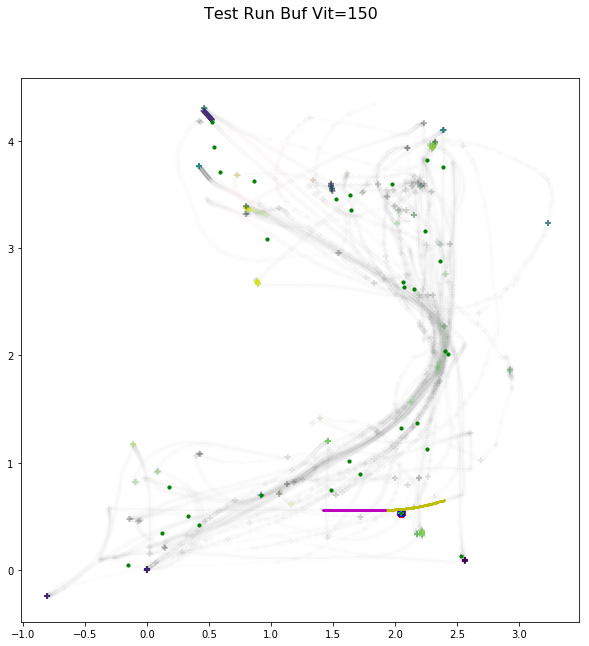

In [15]:
cc=ccxyth
paths= viterbi(obs2_windowed,Modelo2,Modelo2.PI)  #Modelo 2 uses obs2
path=paths[int(-len(paths)/2):]
path_bigdelay = paths[:int(-len(paths)/2)]
cords= path_to_xy(path,cc)
cords_bigdelay = path_to_xy(path_bigdelay,cc)
cords1=path_to_xy(est_windowed.T[int(-len(paths)/2):],cc)
cords1delay=path_to_xy(est_windowed.T[:int(-len(paths)/2)],cc)



fig = plt.figure(figsize=(10,10))
fig.suptitle('Test Run Buf Vit=150', fontsize=16)

ax1 = fig.add_subplot(111)
ax1.scatter(x= data.x, y=data.y,marker='+',c=data.Y,alpha=.00313)

ax1.scatter(x=cords.xcuant, y=cords.ycuant, marker='o',c='r',s=52,alpha=.5 , )
ax1.scatter(x=cords_bigdelay.xcuant, y=cords_bigdelay.ycuant, marker='+',c='m',s=52,alpha=.1 )
ax1.scatter(x=cords1.xcuant, y=cords1.ycuant, marker='o',c='b' ,alpha=1)
ax1.scatter(x=cords1delay.xcuant, y=cords1delay.ycuant, marker='+',c='c' ,alpha=.1)



ax1.scatter(x= odomreal.x[int(-len(paths)/2):], y=odomreal.y[int(-len(paths)/2):],marker='.',s=13,c='y')
ax1.scatter(x= odomreal.x[:int(-len(paths)/2)], y=odomreal.y[:int(-len(paths)/2)],marker='.',s=13,c='m')
cords3=path_to_xy(np.arange(0,Modelo1.A.shape[0]),cc)
ax1.scatter(x= cords3.xcuant, y=cords3.ycuant ,marker='.',s=40,c='g')



In [16]:



buf_vit=60
for i in range(1):
    
    
    obs_windowed= obs[indice:indice+buf_vit]
    obs2_windowed= obs2[indice:indice+buf_vit]
    est_windowed= est[indice:indice+buf_vit]
    odomreal= data[['x','y']].iloc[indice:indice+buf_vit]
    #print(data[['x','y']].iloc[indice:indice+buf_vit],est_windowed)

    print(indice)
    path= viterbi(obs_windowed,Modelo1,Modelo1.PI)
    path2= viterbi(obs2_windowed,Modelo2,Modelo2.PI)
    yhat=np.zeros(len(path)-1)
    yhat2=np.zeros(len(path2)-1)
    ytrue=np.zeros(len(path)-1)
    for i in range(len(path)-1):
        yhat[i]=int(path[i])
        yhat2[i]=int(path2[i])
        ytrue[i]=int(est_windowed[i])
    print(accuracy(ytrue,yhat), accuracy(ytrue,yhat2))

17351
(0.0, 1.0)


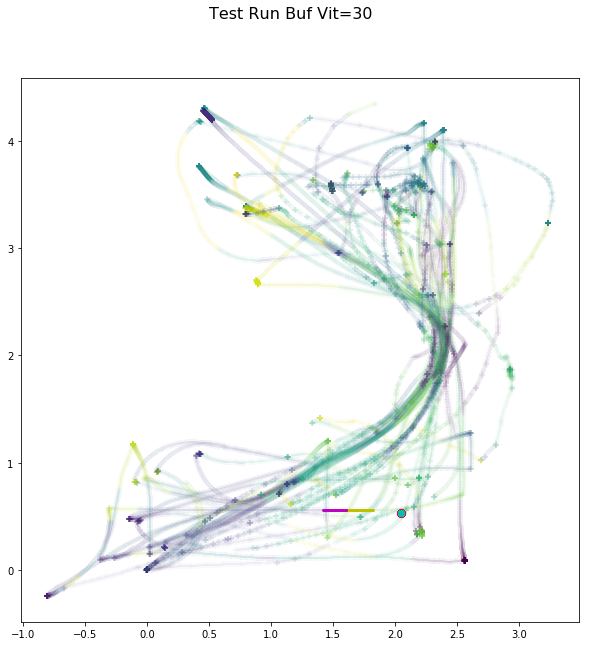

In [17]:
cc=ccxyth
paths= viterbi(obs2_windowed,Modelo2,Modelo2.PI)
path=paths[int(-len(paths)/2):]
path_bigdelay = paths[:int(-len(paths)/2)]
cords= path_to_xy(path,cc)
cords_bigdelay = path_to_xy(path_bigdelay,cc)
cords1=path_to_xy(est_windowed.T[int(-len(paths)/2):],cc)
cords1delay=path_to_xy(est_windowed.T[:int(-len(paths)/2)],cc)



fig = plt.figure(figsize=(10,10))
fig.suptitle('Test Run Buf Vit=30', fontsize=16)

ax1 = fig.add_subplot(111)
ax1.scatter(x= data.x, y=data.y,marker='+',c=data.Y,alpha=.0313)

ax1.scatter(x=cords.xcuant, y=cords.ycuant, marker='o',c='r',s=52,alpha=.5 )
ax1.scatter(x=cords_bigdelay.xcuant, y=cords_bigdelay.ycuant, marker='+',c='r',s=52,alpha=.1 )
ax1.scatter(x=cords1.xcuant, y=cords1.ycuant, marker='o',c='c' ,alpha=.5)
ax1.scatter(x=cords1delay.xcuant, y=cords1delay.ycuant, marker='+',c='c' ,alpha=.1)



ax1.scatter(x= odomreal.x[int(-len(paths)/2):], y=odomreal.y[int(-len(paths)/2):],marker='.',s=13,c='y')
ax1.scatter(x= odomreal.x[:int(-len(paths)/2)], y=odomreal.y[:int(-len(paths)/2)],marker='.',s=13,c='m')



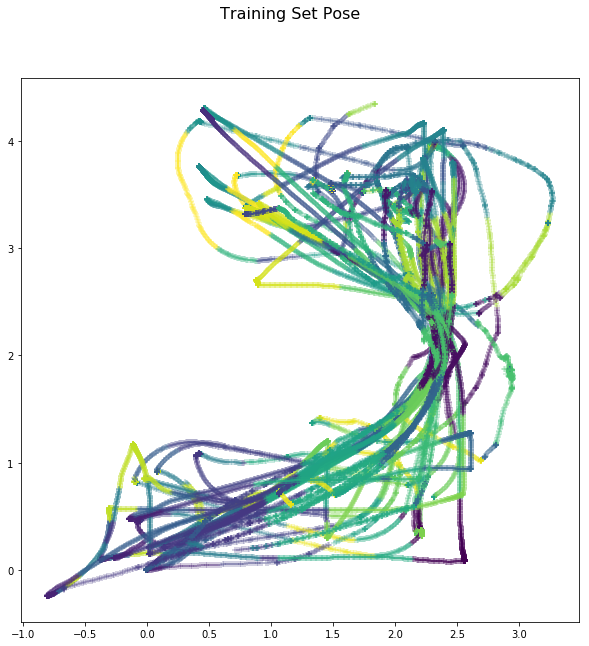

In [18]:


fig = plt.figure(figsize=(10,10))
fig.suptitle('Training Set Pose', fontsize=16)

ax1 = fig.add_subplot(111)
ax1.scatter(x= data.x, y=data.y,marker='+',c=data.Y,alpha=.3)


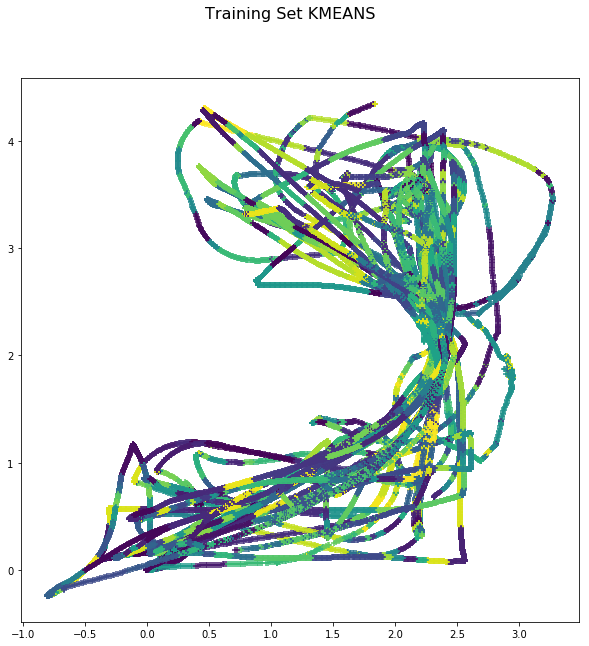

In [19]:


fig = plt.figure(figsize=(10,10))
fig.suptitle('Training Set KMEANS', fontsize=16)

ax1 = fig.add_subplot(111)
ax1.scatter(x= data.x, y=data.y,marker='+',c=data.Vk)


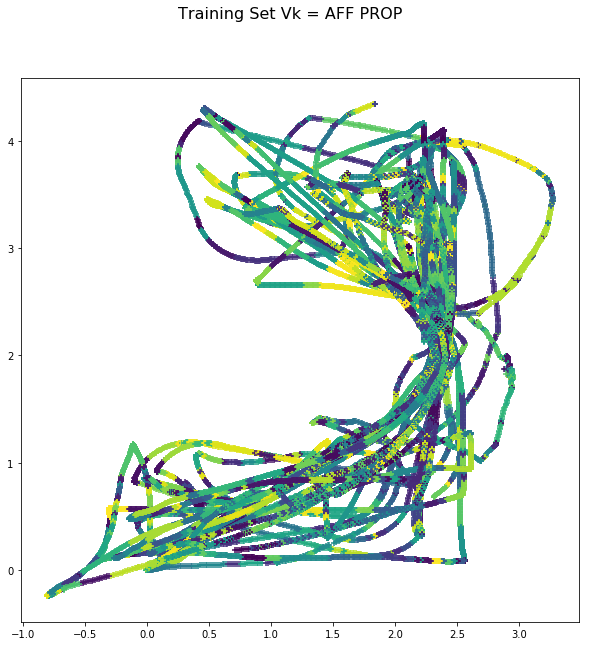

In [20]:


fig = plt.figure(figsize=(10,10))
fig.suptitle('Training Set Vk = AFF PROP', fontsize=16)

ax1 = fig.add_subplot(111)
ax1.scatter(x= data.x, y=data.y,marker='+',c=data.Vk_aff)


In [21]:
data

,R0,R1,R2,R3,R4,R5,R6,R7,R8,R9,...,R717,R718,R719,R720,x,y,theta,Vk_aff,Y,Vk
0,1.396528,1.397393,1.398307,1.399269,1.400280,1.401341,1.402451,1.403610,1.404819,1.406078,...,1.867227,1.862315,1.857492,1.852756,0.814740,0.439526,0.631170,139,6,15
1,1.405517,1.406495,1.407521,1.408598,1.409724,1.410899,1.412125,1.413401,1.414728,1.416105,...,1.862591,1.857858,1.853212,1.848652,0.821618,0.444752,0.644063,139,6,15
2,1.410712,1.411652,1.412641,1.413679,1.414767,1.415905,1.417093,1.418332,1.419620,1.420960,...,1.876717,1.871883,1.867138,1.862480,0.830271,0.451366,0.639084,139,6,15
3,1.416657,1.417555,1.418502,1.419498,1.420545,1.421641,1.422788,1.423985,1.425232,1.426530,...,1.893292,1.888343,1.883484,1.878714,0.840628,0.458839,0.633607,139,6,15
4,1.423344,1.424206,1.425118,1.426080,1.427091,1.428153,1.429265,1.430427,1.431640,1.432903,...,1.910340,1.905284,1.900319,1.895444,0.851976,0.466804,0.628898,139,6,15
5,1.429701,1.430516,1.431381,1.432296,1.433261,1.434276,1.435341,1.436457,1.437623,1.438840,...,1.929417,1.924228,1.919132,1.914129,0.863856,0.474778,0.622863,139,6,15
6,1.435665,1.436422,1.437228,1.438084,1.438991,1.439947,1.440954,1.442011,1.443119,1.444278,...,1.950392,1.945045,1.939794,1.934637,0.876076,0.482663,0.615518,139,6,123
7,1.441524,1.442217,1.442959,1.443752,1.444595,1.445487,1.446431,1.447424,1.448469,1.449564,...,1.972443,1.966925,1.961505,1.956181,0.888536,0.490513,0.607639,139,6,123
8,1.447528,1.448160,1.448842,1.449574,1.450357,1.451189,1.452072,1.453006,1.453990,1.455025,...,1.994446,1.988760,1.983174,1.977686,0.901104,0.498331,0.600174,139,6,123
9,1.453805,1.454386,1.455016,1.455696,1.456427,1.457208,1.458040,1.458922,1.459855,1.460838,...,2.015519,2.009679,2.003941,1.998304,0.913654,0.506109,0.593762,139,6,123


In [22]:
graphe= Markov_A_2_grafo(A,ccxyth)
ruta=dijkstra(0,6,graphe)


RUTA CALCULADA 


In [23]:

def Markov_A_2_grafo(A,ccxyth):
    dists=np.zeros(A.shape)
    for i in range(A.shape[0]):
        for j in range (A.shape[1]):
            if A[i,j]!=0 :
                dists[i,j]= np.linalg.norm(ccxyth[i]-ccxyth[j])    
    
    
    con = np.where(dists==0,np.inf,dists)
    graphe2=grafo(ccxyth,con)
    return graphe2


In [24]:
graphe= Markov_A_2_grafo(A,ccxyth)


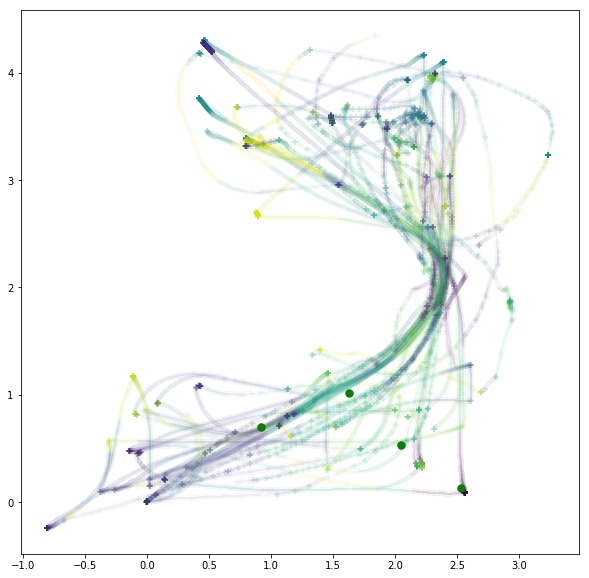

In [25]:
#ruta.append(nodofinal)
path=np.array(ruta)
path
cords_path= path_to_xy(path,cc)
#cords_path= path_to_xy(path[:int(len(path)/2)],cc)

cords_path2= path_to_xy(path,cc)



fig = plt.figure(figsize=(10,10))
ax1 = fig.add_subplot(111)
ax1.scatter(x= data.x, y=data.y,marker='+',c=data.Y,alpha=.0313)

ax1.scatter(x=cords_path.xcuant, y=cords_path.ycuant, marker='o',c='r',s=52,alpha=.5 )
ax1.scatter(x=cords_path2.xcuant, y=cords_path2.ycuant, marker='o',c='g',s=52 )


In [26]:

def dijkstra(nodoinicial,nodofinal,graphe):
    if (nodofinal > graphe.nodos.shape[0]):
        print ('Wrong dimensions for requested node')
        return None

    numnodos= len(graphe.nodos)
    con = graphe.conec
    D= np.ones(numnodos)*np.inf
    Prv= np.ones(numnodos)*np.inf
    V= np.zeros(numnodos)
    a = nodoinicial
    D[a]=0
    Prv[a]=0
    Prv[np.where(con[a]!=np.inf)]=a
    V[a]=1
    Dacc=D[a]
    ########
    D=np.minimum(D,con[a]+D[a])
    cont=0
    sucess=False
    while(sucess==False):
        a = np.argmin(D+np.where (V==1,np.inf, V))
        Dacc=D[a]
        Prv[np.where(D>(con[a]+Dacc) )]=a
        V[a]=1
        D=np.minimum(D,con[a]+Dacc)
        if (a== nodofinal):
            print("RUTA CALCULADA ")
            sucess=True
    rutainv=[]
    rutainv.append(nodofinal)
    while(rutainv[-1]!=nodoinicial):
        prv=Prv[int(rutainv[-1])]
        rutainv.append(prv)

    ruta=[]
    for n in reversed(rutainv):
        ruta.append(n)
    return(ruta)


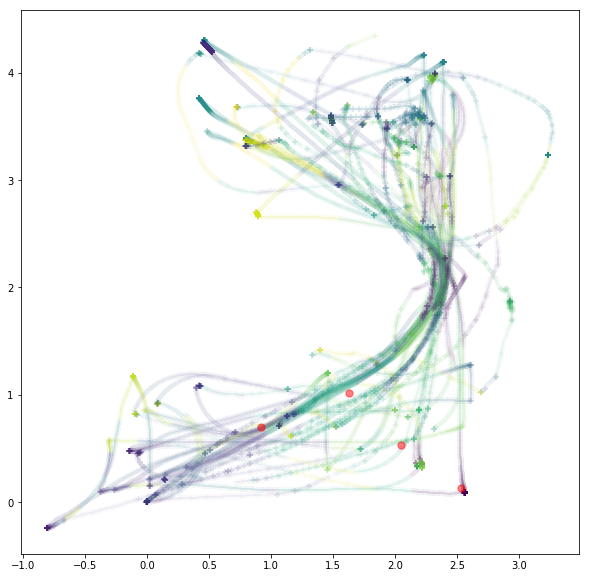

In [27]:
path=np.array(ruta)


cords_path= path_to_xy(path,cc)
#cords_path= path_to_xy(path[:int(len(path)/2)],cc)
#cords_path2= path_to_xy(path[int(len(path)/2):],cc)



fig = plt.figure(figsize=(10,10))
ax1 = fig.add_subplot(111)
ax1.scatter(x= data.x, y=data.y,marker='+',c=data.Y,alpha=.0313)

ax1.scatter(x=cords_path.xcuant, y=cords_path.ycuant, marker='o',c='r',s=52,alpha=.5 )
#ax1.scatter(x=cords_path2.xcuant, y=cords_path2.ycuant, marker='o',c='g',s=52,alpha=.5 )

In [28]:
#lec=np.load('lec.npy')
aux=pd.DataFrame(data.Vk.value_counts())



lec_deseada=aux.index[0]   ###CHOOSING MOST FREQUENT OBSERVATION SYMBOL

lec=data[data.Vk==lec_deseada].sample(n=1,axis=0).iloc[:,:-6].values.ravel()


start_ang=-240/2*np.pi/180
stop_ang= 240/2*np.pi/180
angs=np.linspace(start_ang,stop_ang,num=len(lec))
lec.shape,lec_deseada

((721,), 12)

12


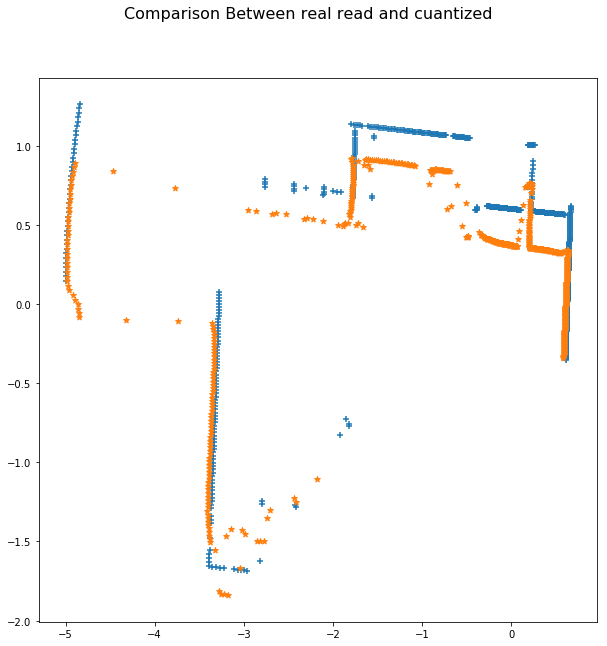

In [29]:
cordsy, cordsx= np.cos(angs) *  lec ,  np.sin(angs) *  lec
CORDS=pd.DataFrame((cordsx,cordsy))
CORDS=CORDS.T
CORDS.columns=['x','y']
print(np.power(lec.T-ccvk,2).sum(axis=1,keepdims=True).argmin())
lec_leida= np.power(lec.T-ccvk,2).sum(axis=1,keepdims=True).argmin()
vec_obs=ccvk[np.power(lec.T-ccvk,2).sum(axis=1,keepdims=True).argmin()]
cordsy, cordsx= np.cos(angs) *  vec_obs ,  np.sin(angs) *  vec_obs
CORDS['xx'],CORDS['yy']=cordsx,cordsy


fig = plt.figure(figsize=(10,10))
fig.suptitle('Comparison Between real read and cuantized', fontsize=16)

ax1 = fig.add_subplot(111)
ax1.scatter(x= CORDS.x, y=CORDS.y,marker='+')
ax1.scatter(x=CORDS.xx,y=CORDS.yy,marker='*')

In [30]:
lecs=data[data.Vk==lec_leida]
lecs.shape

(2295, 727)

In [31]:
auxy , auxx =np.array([0,0]),np.array([0,0])
start_ang=-250/2*np.pi/180
stop_ang= 250/2*np.pi/180
angs=np.linspace(start_ang,stop_ang,num=len(vec_obs))


lecs=data[data.Vk==lec_leida].sample(n=10,axis=0).iloc[:,:-6]

for  vec_obs in lecs.values.tolist():
    cordsy,cordsx= np.cos(angs) *  vec_obs ,  np.sin(angs) *  vec_obs
    auxy,auxx=np.concatenate((auxy,cordsy)),np.concatenate((auxx,cordsx))
print(lec_leida)    

12


12


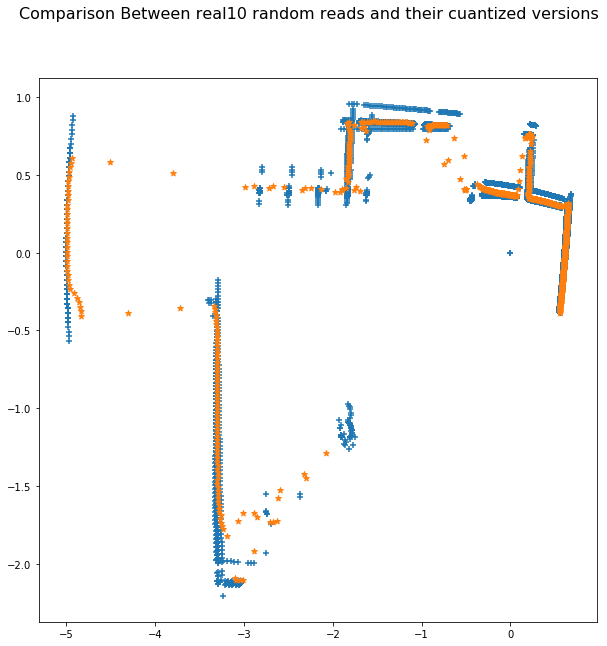

In [32]:

CORDS=pd.DataFrame((auxx,auxy))
CORDS=CORDS.T
CORDS.columns=['x','y']
vec_obs=ccvk[np.power(lec.T-ccvk,2).sum(axis=1,keepdims=True).argmin()]
cordsy, cordsx= np.cos(angs) *  vec_obs ,  np.sin(angs) *  vec_obs

CORDSVK=pd.DataFrame()
CORDSVK['xx'],CORDSVK['yy']=cordsx,cordsy


fig = plt.figure(figsize=(10,10))
fig.suptitle('Comparison Between real10 random reads and their cuantized versions', fontsize=16)

ax1 = fig.add_subplot(111)
ax1.scatter(x= CORDS.x, y=CORDS.y,marker='+')
ax1.scatter(x=CORDSVK.xx,y=CORDSVK.yy,marker='*')
print(lec_leida)

In [33]:
#lec=np.load('lec.npy')
aux=pd.DataFrame(data.Vk.value_counts())


 
lec_deseada=aux.index[4]   ###CHOOSING 5th MOST FREQUENT OBSERVATION SYMBOL

lec=data[data.Vk==lec_deseada].sample(n=1,axis=0).iloc[:,:-6].values.ravel()


start_ang=-240/2*np.pi/180
stop_ang= 240/2*np.pi/180
angs=np.linspace(start_ang,stop_ang,num=len(lec))
lec.shape,lec_deseada

((721,), 22)

22


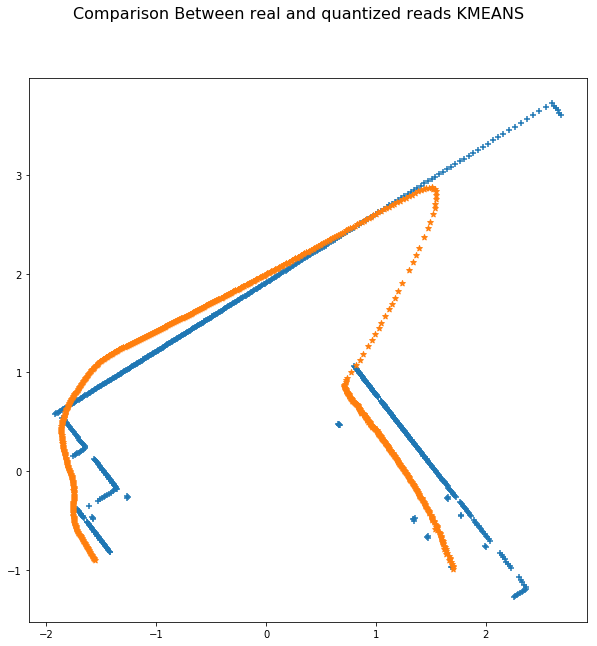

In [34]:
cordsy, cordsx= np.cos(angs) *  lec ,  np.sin(angs) *  lec
CORDS=pd.DataFrame((cordsx,cordsy))
CORDS=CORDS.T
CORDS.columns=['x','y']
print(np.power(lec.T-ccvk,2).sum(axis=1,keepdims=True).argmin())
lec_leida= np.power(lec.T-ccvk,2).sum(axis=1,keepdims=True).argmin()
vec_obs=ccvk[np.power(lec.T-ccvk,2).sum(axis=1,keepdims=True).argmin()]
cordsy, cordsx= np.cos(angs) *  vec_obs ,  np.sin(angs) *  vec_obs
CORDS['xx'],CORDS['yy']=cordsx,cordsy


fig = plt.figure(figsize=(10,10))
fig.suptitle('Comparison Between real and quantized reads KMEANS', fontsize=16)

ax1 = fig.add_subplot(111)
ax1.scatter(x= CORDS.x, y=CORDS.y,marker='+')
ax1.scatter(x=CORDS.xx,y=CORDS.yy,marker='*')

In [35]:
auxy , auxx =np.array([0,0]),np.array([0,0])
start_ang=-250/2*np.pi/180
stop_ang= 250/2*np.pi/180
angs=np.linspace(start_ang,stop_ang,num=len(vec_obs))


lecs=data[data.Vk==lec_leida].sample(n=10,axis=0 , replace=True).iloc[:,:-6]

for  vec_obs in lecs.values.tolist():
    cordsy,cordsx= np.cos(angs) *  vec_obs ,  np.sin(angs) *  vec_obs
    auxy,auxx=np.concatenate((auxy,cordsy)),np.concatenate((auxx,cordsx))
print(lec_leida)    

22


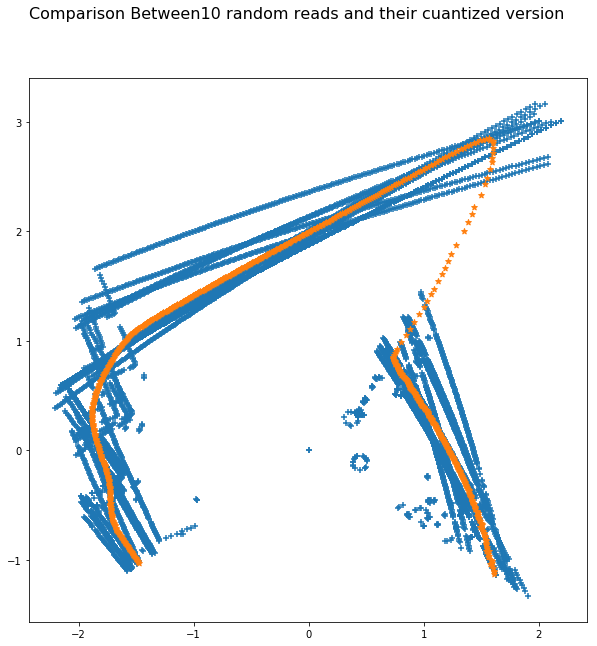

In [36]:

CORDS=pd.DataFrame((auxx,auxy))
CORDS=CORDS.T
CORDS.columns=['x','y']
vec_obs=ccvk[np.power(lec.T-ccvk,2).sum(axis=1,keepdims=True).argmin()]
cordsy, cordsx= np.cos(angs) *  vec_obs ,  np.sin(angs) *  vec_obs

CORDSVK=pd.DataFrame()
CORDSVK['xx'],CORDSVK['yy']=cordsx,cordsy


fig = plt.figure(figsize=(10,10))
fig.suptitle('Comparison Between10 random reads and their cuantized version ' , fontsize=16)

ax1 = fig.add_subplot(111)
ax1.scatter(x= CORDS.x, y=CORDS.y,marker='+')
ax1.scatter(x=CORDSVK.xx,y=CORDSVK.yy,marker='*')

In [37]:
############################################################################################


In [38]:
#lec=np.load('lec.npy')
aux=pd.DataFrame(data.Vk_aff.value_counts())



lec_deseada=aux.index[0]   ###CHOOSING MOST FREQUENT OBSERVATION SYMBOL

lec=data[data.Vk_aff==lec_deseada].sample(n=1,axis=0).iloc[:,:-6].values.ravel()


start_ang=-240/2*np.pi/180
stop_ang= 240/2*np.pi/180
angs=np.linspace(start_ang,stop_ang,num=len(lec))
lec.shape,lec_deseada

((721,), 6)

COMPARING AFF PROP READINGS NO centroid
6


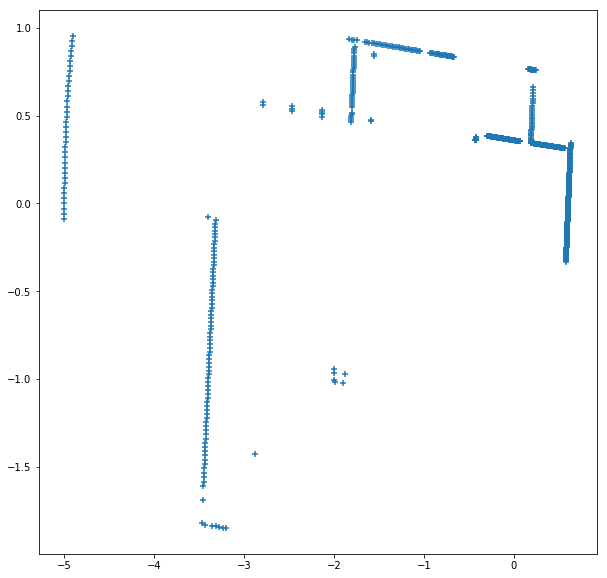

In [39]:
cordsy, cordsx= np.cos(angs) *  lec ,  np.sin(angs) *  lec
CORDS=pd.DataFrame((cordsx,cordsy))
CORDS=CORDS.T
CORDS.columns=['x','y']
print("COMPARING AFF PROP READINGS NO centroid")

lec_leida= (int)( clf.predict(lec.reshape(1, -1)))
print(lec_leida)

fig = plt.figure(figsize=(10,10))


ax1 = fig.add_subplot(111)
ax1.scatter(x= CORDS.x, y=CORDS.y,marker='+')


In [40]:
auxy , auxx =np.array([0,0]),np.array([0,0])
start_ang=-250/2*np.pi/180
stop_ang= 250/2*np.pi/180
angs=np.linspace(start_ang,stop_ang,num=len(vec_obs))


lecs=data[data.Vk_aff==lec_leida].sample(n=10,axis=0).iloc[:,:-6]

for  vec_obs in lecs.values.tolist():
    cordsy,cordsx= np.cos(angs) *  vec_obs ,  np.sin(angs) *  vec_obs
    auxy,auxx=np.concatenate((auxy,cordsy)),np.concatenate((auxx,cordsx))
print(lec_leida)    

6


6


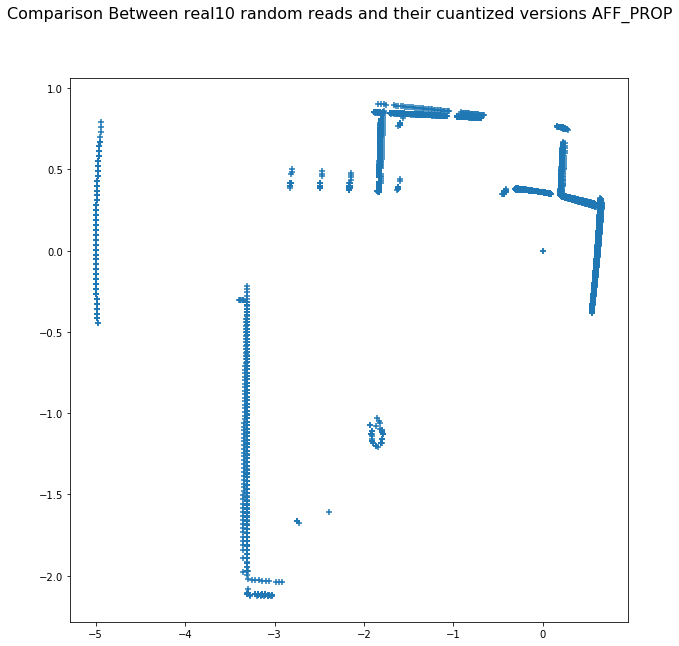

In [41]:

CORDS=pd.DataFrame((auxx,auxy))
CORDS=CORDS.T
CORDS.columns=['x','y']

fig = plt.figure(figsize=(10,10))
fig.suptitle('Comparison Between real10 random reads and their cuantized versions AFF_PROP', fontsize=16)

ax1 = fig.add_subplot(111)
ax1.scatter(x= CORDS.x, y=CORDS.y,marker='+')

print(lec_leida)

In [42]:
#lec=np.load('lec.npy')
aux=pd.DataFrame(data.Vk_aff.value_counts())



lec_deseada=aux.index[3]   ###CHOOSING 3rd MOST FREQUENT OBSERVATION SYMBOL

lec=data[data.Vk_aff==lec_deseada].sample(n=1,axis=0).iloc[:,:-6].values.ravel()


start_ang=-240/2*np.pi/180
stop_ang= 240/2*np.pi/180
angs=np.linspace(start_ang,stop_ang,num=len(lec))
lec.shape,lec_deseada

((721,), 173)

COMPARING AFF PROP READINGS NO centroid
173


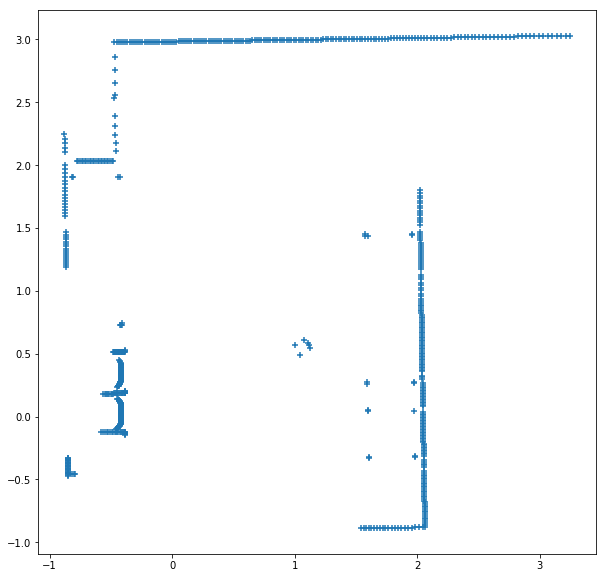

In [43]:
cordsy, cordsx= np.cos(angs) *  lec ,  np.sin(angs) *  lec
CORDS=pd.DataFrame((cordsx,cordsy))
CORDS=CORDS.T
CORDS.columns=['x','y']
print("COMPARING AFF PROP READINGS NO centroid")

lec_leida= (int)( clf.predict(lec.reshape(1, -1)))
print(lec_leida)

fig = plt.figure(figsize=(10,10))


ax1 = fig.add_subplot(111)
ax1.scatter(x= CORDS.x, y=CORDS.y,marker='+')


In [44]:
auxy , auxx =np.array([0,0]),np.array([0,0])
start_ang=-250/2*np.pi/180
stop_ang= 250/2*np.pi/180
angs=np.linspace(start_ang,stop_ang,num=len(vec_obs))


lecs=data[data.Vk_aff==lec_leida].sample(n=10,axis=0).iloc[:,:-6]

for  vec_obs in lecs.values.tolist():
    cordsy,cordsx= np.cos(angs) *  vec_obs ,  np.sin(angs) *  vec_obs
    auxy,auxx=np.concatenate((auxy,cordsy)),np.concatenate((auxx,cordsx))
print(lec_leida)    

173


173


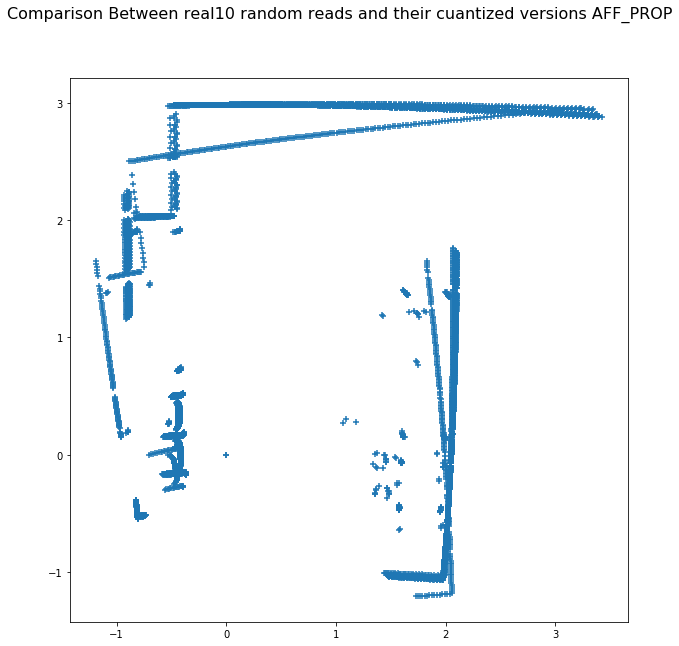

In [45]:

CORDS=pd.DataFrame((auxx,auxy))
CORDS=CORDS.T
CORDS.columns=['x','y']

fig = plt.figure(figsize=(10,10))
fig.suptitle('Comparison Between real10 random reads and their cuantized versions AFF_PROP', fontsize=16)

ax1 = fig.add_subplot(111)
ax1.scatter(x= CORDS.x, y=CORDS.y,marker='+')

print(lec_leida)

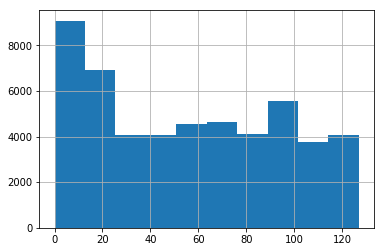

In [46]:
data.Vk.hist()

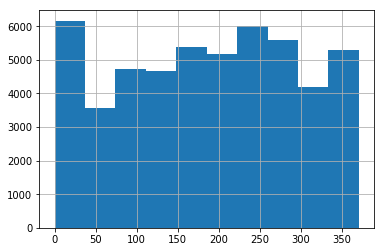

In [47]:
data.Vk_aff.hist()

(<matplotlib.collections.PathCollection at 0x7fe758097fd0>,
                  x            y      Vk            Y
 count  2295.000000  2295.000000  2295.0  2295.000000
 mean      2.555295     0.100634    12.0     0.009150
 std       0.041943     0.052373     0.0     0.438357
 min       2.152624     0.078849    12.0     0.000000
 25%       2.561100     0.089437    12.0     0.000000
 50%       2.561355     0.089825    12.0     0.000000
 75%       2.561773     0.090984    12.0     0.000000
 max       2.562239     0.594021    12.0    21.000000)

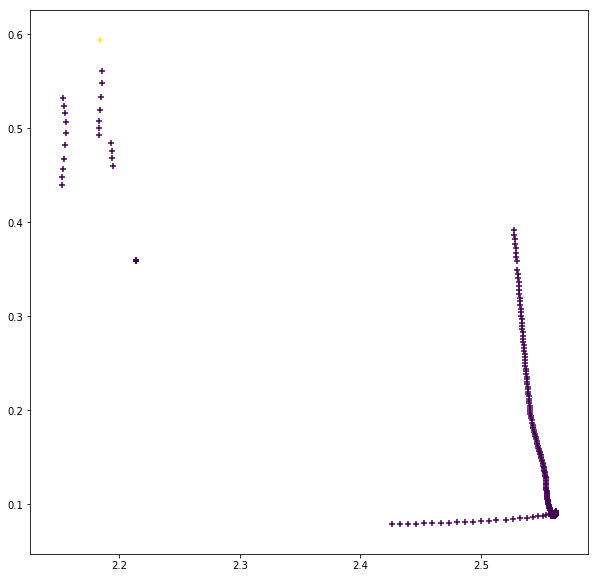

In [48]:
aux=pd.DataFrame(data.Vk.value_counts())
xy=data[['x','y','Vk','Y']][data.Vk==(aux.index[0]  ) ]
CORDS=xy
fig = plt.figure(figsize=(10,10))

ax1 = fig.add_subplot(111)
ax1.scatter(x= CORDS.x, y=CORDS.y,marker='+', c=CORDS.Y),xy.describe()

(<matplotlib.collections.PathCollection at 0x7fe75793bc90>,
                  x            y        theta           Vk            Y
 count  5143.000000  5143.000000  5143.000000  5143.000000  5143.000000
 mean      1.559399     2.098035     0.454632    29.832199     7.585845
 std       0.943884     1.893473     1.981790    36.811112    11.077850
 min       0.452986     0.078849    -3.137265     8.000000     0.000000
 25%       0.518952     0.089989    -1.652308     8.000000     0.000000
 50%       1.121058     3.243550     1.289196    12.000000     4.000000
 75%       2.561278     4.202627     2.286572    12.000000     4.000000
 max       2.562239     4.283506     3.134455    99.000000    29.000000)

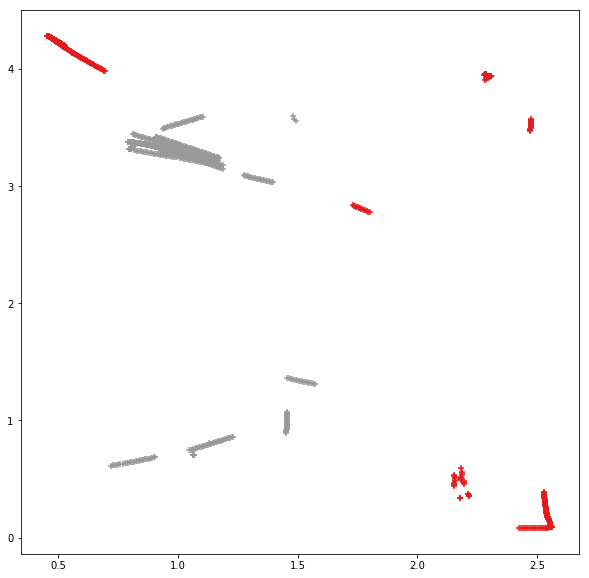

In [49]:
aux=pd.DataFrame(data.Vk.value_counts())
xy=data[['x','y','theta','Vk','Y']][data.Vk==aux.index[0]]
xy= xy.append(data[['x','y','theta','Vk','Y']][data.Vk==aux.index[1]])
xy= xy.append(data[['x','y','theta','Vk','Y']][data.Vk==aux.index[2]])


CORDS=xy
fig = plt.figure(figsize=(10,10))

ax1 = fig.add_subplot(111)
ax1.scatter(x= CORDS.x, y=CORDS.y, c=CORDS.Vk,marker='+',cmap='Set1'),xy.describe()

(<matplotlib.collections.PathCollection at 0x7fe75791e0d0>,
                  x            y  Vk_aff       Y
 count  1128.000000  1128.000000  1128.0  1128.0
 mean      2.560860     0.089454     6.0     0.0
 std       0.003924     0.000781     0.0     0.0
 min       2.486326     0.080866     6.0     0.0
 25%       2.561061     0.089370     6.0     0.0
 50%       2.561172     0.089465     6.0     0.0
 75%       2.561290     0.089629     6.0     0.0
 max       2.562070     0.095594     6.0     0.0)

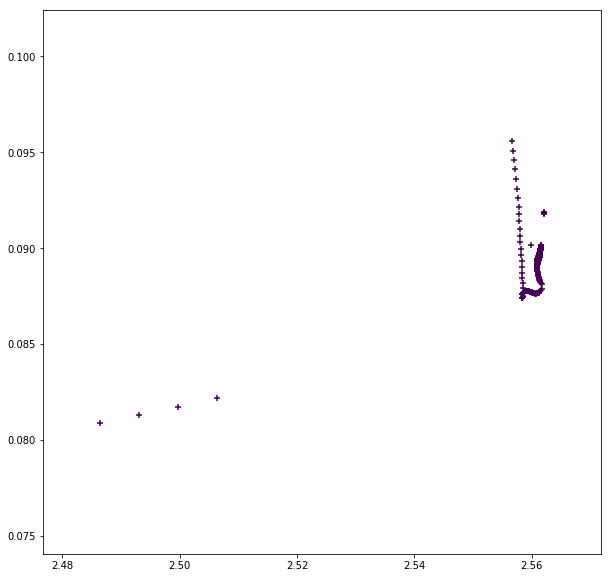

In [50]:
aux=pd.DataFrame(data.Vk_aff.value_counts())
xy=data[['x','y','Vk_aff','Y']][data.Vk_aff==(aux.index[0]  ) ]
CORDS=xy
fig = plt.figure(figsize=(10,10))

ax1 = fig.add_subplot(111)
ax1.scatter(x= CORDS.x, y=CORDS.y,marker='+', c=CORDS.Y),xy.describe()

(<matplotlib.collections.PathCollection at 0x7fe757841690>,
                  x            y        theta      Vk_aff            Y
 count  3029.000000  3029.000000  3029.000000  3029.00000  3029.000000
 mean      1.955306     1.316222    -0.499043   120.72070     1.337075
 std       0.928349     1.874129     1.778589   114.03624     2.480761
 min       0.479447     0.080866    -1.683079     6.00000     0.000000
 25%       0.523798     0.089507    -1.654716     6.00000     0.000000
 50%       2.561182     0.090499    -1.649042   101.00000     0.000000
 75%       2.561632     4.197163     2.239281   283.00000     4.000000
 max       2.562239     4.248840     2.324503   283.00000    25.000000)

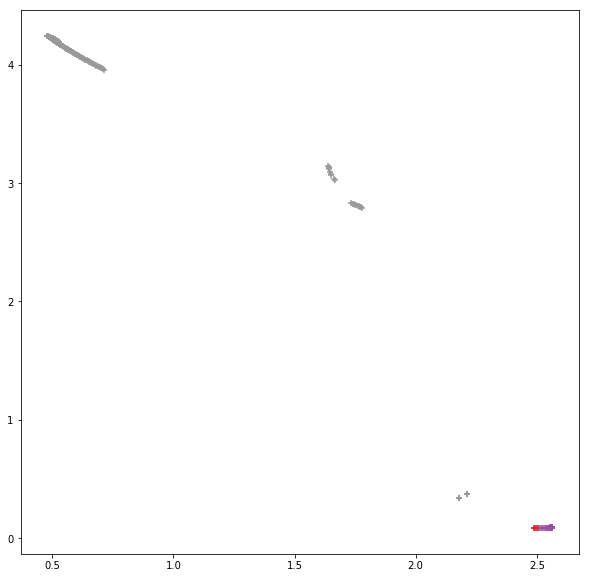

In [51]:
aux=pd.DataFrame(data.Vk_aff.value_counts())
xy=data[['x','y','theta','Vk_aff','Y']][data.Vk_aff==aux.index[0]]
xy= xy.append(data[['x','y','theta','Vk_aff','Y']][data.Vk_aff==aux.index[1]])
xy= xy.append(data[['x','y','theta','Vk_aff','Y']][data.Vk_aff==aux.index[2]])


CORDS=xy
fig = plt.figure(figsize=(10,10))

ax1 = fig.add_subplot(111)
ax1.scatter(x= CORDS.x, y=CORDS.y, c=CORDS.Vk_aff,marker='+',cmap='Set1'),xy.describe()

In [52]:
aux=pd.DataFrame(data.Vk.value_counts())
cents=[]
for i in aux.index[:3]:
    print (data[data.Vk==i][['x','y','theta']].describe())
    cents.append(data[data.Vk==i][['x','y','theta']].mean(axis=0))

aux=pd.DataFrame(data.Vk_aff.value_counts())
cents_aff=[]
for i in aux.index[:3]:
    print (data[data.Vk_aff==i][['x','y','theta']].describe())
    cents_aff.append(data[data.Vk_aff==i][['x','y','theta']].mean(axis=0))

                 x            y        theta
count  2295.000000  2295.000000  2295.000000
mean      2.555295     0.100634    -1.651537
std       0.041943     0.052373     0.019118
min       2.152624     0.078849    -1.791245
25%       2.561100     0.089437    -1.655976
50%       2.561355     0.089825    -1.652927
75%       2.561773     0.090984    -1.647801
max       2.562239     0.594021    -1.436464
                 x            y        theta
count  1715.000000  1715.000000  1715.000000
mean      0.630665     4.132601     2.117685
std       0.461924     0.511902     0.583959
min       0.452986     0.341114    -1.414446
25%       0.479933     4.202627     2.247265
50%       0.506190     4.220007     2.259628
75%       0.518952     4.251688     2.291324
max       2.475050     4.283506     2.323344
                 x            y        theta
count  1133.000000  1133.000000  1133.000000
mean      0.947922     3.064278     2.203546
std       0.168754     0.767465     1.038386
min       

In [53]:
cents_aff=np.asarray(cents_aff)

In [54]:
cents_aff

array([[ 2.56085965,  0.08945352, -1.6560742 ],
       [ 2.56158688,  0.09071857, -1.64748743],
       [ 0.55983714,  4.14031023,  2.1565736 ]])

In [55]:
cents

[x        2.555295
 y        0.100634
 theta   -1.651537
 dtype: float64, x        0.630665
 y        4.132601
 theta    2.117685
 dtype: float64, x        0.947922
 y        3.064278
 theta    2.203546
 dtype: float64]

In [56]:
calc_trans=True

In [ ]:
if calc_trans:
    trans=np.zeros((len(A),len(A),3))
    for j in range (len(A)):
        for k in range (len(A)):
                #print(j,k)
                prom=[]
                for i in range (len(data)-1):
                    if data.Y.iloc[i]==(int)(j) and data.Y.iloc[i+1]==(int)(k) and data.Y.iloc[i+1]!=j :
                        prom.append(data[['x','y','theta']].iloc[i].values)
                        #print (prom)
                if (len(prom)>0):
                    #print(np.asarray(prom).mean(axis=0))
                    trans[j,k,:]=np.asarray(prom).mean(axis=0)

In [ ]:
np.save('trans.npy',trans , allow_pickle=True)

In [ ]:
trans[0,1]

In [ ]:
trans.shape

In [ ]:
trans=np.load('trans.npy')
trans.shape

In [ ]:
A[0,:]

In [ ]:
np.save('trans.npy',trans , allow_pickle=True)

In [ ]:
np.load('trans.npy')[13,:]

In [ ]:
import numpy as np

In [ ]:
x_draw,y_draw, th_draw = np.linspace(0,4,100),np.linspace(0,4,100),np.linspace(0,6.28,100)

In [ ]:

points=[]

for x in x_draw:
    for y in y_draw:
        for orientation in th_draw:
            points.append(np.asarray((x,y,orientation)))
        

In [ ]:

quant_points=[]
for point in points:
    quant_points.append(quantized(point,ccxyth))
points=np.asarray(points)
quant_points=np.asarray(quant_points)

In [ ]:
fig = plt.figure(figsize=(10,10))

ax1 = fig.add_subplot(111)
ax1.scatter(x= points[:,0], y=points[:,1], c=quant_points[:,1] ,marker='+',cmap='Set1')

In [ ]:
fig = plt.figure(figsize=(10,10))

ax1 = fig.add_subplot(111)
ax1.scatter(x= points[:,0]+.3*points[:,2], y=points[:,1]+.3*points[:,2],s=.01, c=quant_points[:,1] ,marker='+',cmap='Set1')